In [1]:

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('purchase data.csv')
df

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0


In [3]:

df_purchase=df.dropna()
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca= pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors
df_pa

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,2.24,2.79,0,0,1,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,2.24,2.77,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,2.24,2.75,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,2.24,2.80,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0


In [4]:
#Purchase Probability Model
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
model_purchase.coef_

array([[-2.34796393]])

In [6]:
#Price Elasticity of Purchase Probability
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [7]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [11]:
df_price_range = pd.DataFrame(price_range)
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [12]:
df_price_elasticities = pd.DataFrame(price_range)
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096386
1,0.51,-0.100453
2,0.52,-0.104648
3,0.53,-0.108972
4,0.54,-0.113430
...,...,...
295,3.45,-8.012558
296,3.46,-8.037807
297,3.47,-8.063022
298,3.48,-8.088203


In [13]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096386
1,0.51,-0.100453
2,0.52,-0.104648
3,0.53,-0.108972
4,0.54,-0.113430
5,0.55,-0.118024
6,0.56,-0.122759
7,0.57,-0.127636
8,0.58,-0.132660
9,0.59,-0.137835


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

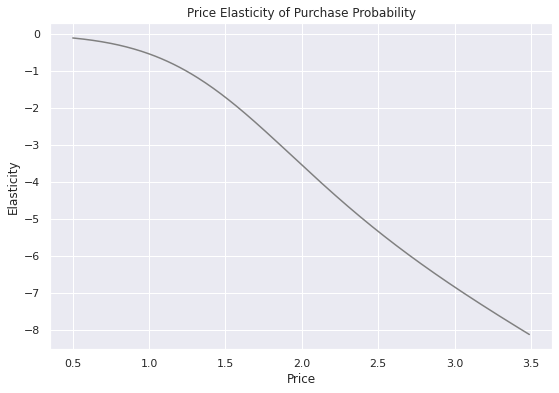

In [14]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [15]:
#Purchase Probability by Segments
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]
Y = df_pa_segment_1['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [16]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model_incidence_segment_1.coef_

array([[-3.63755781]])

In [18]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

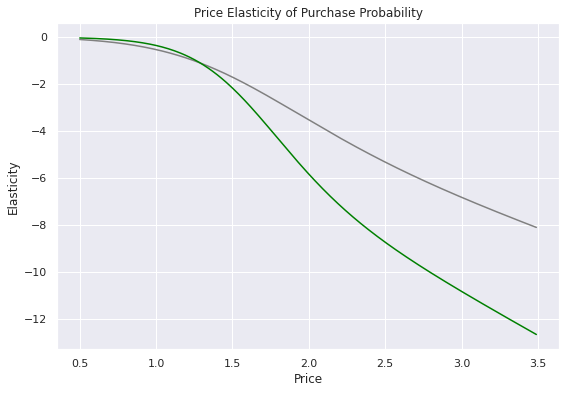

In [19]:
#Results
df_price_elasticities['PE_Segment_1'] = pe_segment_1
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [20]:
#Segment2-Fewer Opportunities
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

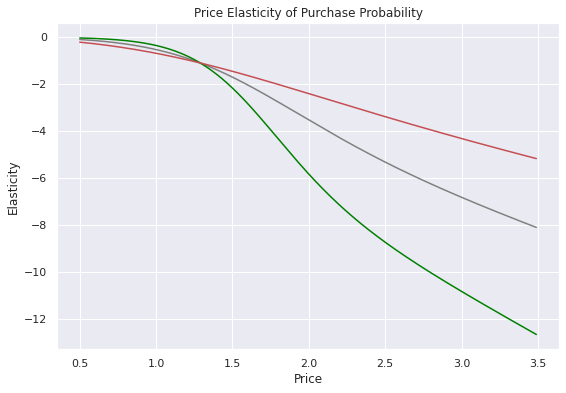

In [21]:

df_price_elasticities['PE_Segment_2'] = pe_segment2
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [22]:
#Segment0
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

In [23]:
#Segment 3
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096386,-0.168077,-0.031026,-0.209928,-0.235765
1,0.51,-0.100453,-0.173003,-0.032798,-0.216500,-0.243145
2,0.52,-0.104648,-0.177999,-0.034658,-0.223182,-0.250649
3,0.53,-0.108972,-0.183066,-0.036608,-0.229973,-0.258277
4,0.54,-0.113430,-0.188205,-0.038653,-0.236876,-0.266029


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

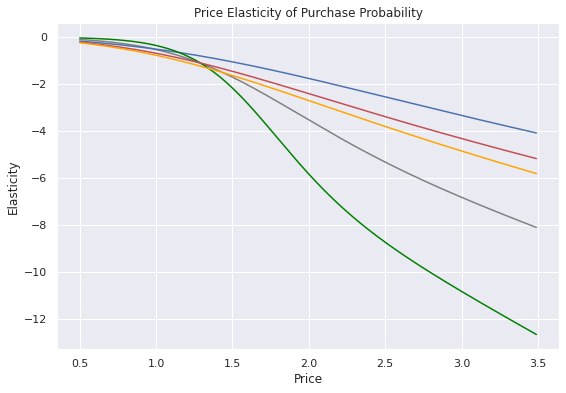

In [24]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

In [25]:
#Purchase Probability with Promotion Feature
Y = df_pa['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


In [26]:
#Model Estimation
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49388929,  0.56158072]])

In [27]:
#Price Elasticity with Promotion
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion['Promotion'] = 1
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities.head()

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096386,-0.168077,-0.031026,-0.209928,-0.235765,-0.125677
1,0.51,-0.100453,-0.173003,-0.032798,-0.216500,-0.243145,-0.129791
2,0.52,-0.104648,-0.177999,-0.034658,-0.223182,-0.250649,-0.133985
3,0.53,-0.108972,-0.183066,-0.036608,-0.229973,-0.258277,-0.138258
4,0.54,-0.113430,-0.188205,-0.038653,-0.236876,-0.266029,-0.142612


In [28]:
#Price Elasticity with No Promotion
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

df_price_elasticity_promotion_no['Promotion'] = 0

Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)
Y_no_promo 



array([[0.26183269, 0.73816731],
       [0.26473028, 0.73526972],
       [0.26764831, 0.73235169],
       [0.27058666, 0.72941334],
       [0.27354523, 0.72645477],
       [0.27652388, 0.72347612],
       [0.27952249, 0.72047751],
       [0.28254091, 0.71745909],
       [0.28557901, 0.71442099],
       [0.28863664, 0.71136336],
       [0.29171363, 0.70828637],
       [0.29480983, 0.70519017],
       [0.29792508, 0.70207492],
       [0.30105918, 0.69894082],
       [0.30421197, 0.69578803],
       [0.30738326, 0.69261674],
       [0.31057285, 0.68942715],
       [0.31378055, 0.68621945],
       [0.31700614, 0.68299386],
       [0.32024941, 0.67975059],
       [0.32351015, 0.67648985],
       [0.32678813, 0.67321187],
       [0.33008311, 0.66991689],
       [0.33339487, 0.66660513],
       [0.33672315, 0.66327685],
       [0.34006771, 0.65993229],
       [0.34342829, 0.65657171],
       [0.34680462, 0.65319538],
       [0.35019645, 0.64980355],
       [0.35360349, 0.64639651],
       [0.

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

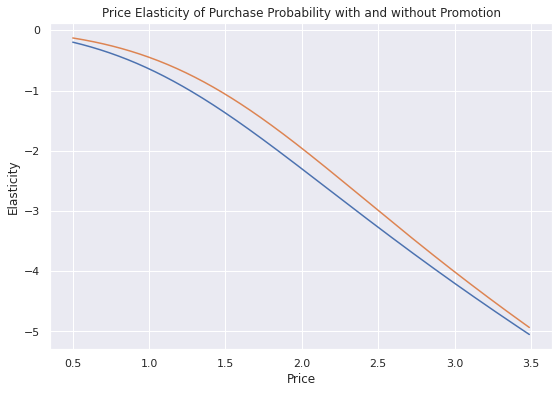

In [29]:
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')


In [30]:
#brand Choice
#Data Preparation
brand_choice = df_pa[df_pa['Incidence'] == 1]
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0


In [31]:
Y = brand_choice['Brand']

brand_choice.columns.values
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [32]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model_brand_choice.coef_
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915963,0.658460,2.417696,0.704080,-0.202119
1,1.274608,-1.879857,-0.212663,-0.206344,0.587866
2,1.624207,0.562115,0.500966,1.039521,0.452813
3,0.574532,0.395586,-1.400631,-1.246247,0.249344
4,0.442616,0.263697,-1.305368,-0.291010,-1.087904


In [34]:

bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [35]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [36]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)
pr_own_brand_5 = predict_brand_5[: ][:, 4]
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [37]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096386,-0.168077,-0.031026,-0.209928,-0.235765,-0.125677,-0.195575,-0.049055
1,0.51,-0.100453,-0.173003,-0.032798,-0.216500,-0.243145,-0.129791,-0.201694,-0.050616
2,0.52,-0.104648,-0.177999,-0.034658,-0.223182,-0.250649,-0.133985,-0.207915,-0.052207
3,0.53,-0.108972,-0.183066,-0.036608,-0.229973,-0.258277,-0.138258,-0.214240,-0.053827
4,0.54,-0.113430,-0.188205,-0.038653,-0.236876,-0.266029,-0.142612,-0.220669,-0.055477
5,0.55,-0.118024,-0.193415,-0.040798,-0.243890,-0.273907,-0.147048,-0.227203,-0.057158
6,0.56,-0.122759,-0.198698,-0.043046,-0.251018,-0.281911,-0.151566,-0.233842,-0.058871
7,0.57,-0.127636,-0.204053,-0.045402,-0.258258,-0.290043,-0.156169,-0.240588,-0.060615
8,0.58,-0.132660,-0.209482,-0.047871,-0.265613,-0.298303,-0.160857,-0.247442,-0.062391
9,0.59,-0.137835,-0.214984,-0.050458,-0.273083,-0.306692,-0.165630,-0.254403,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

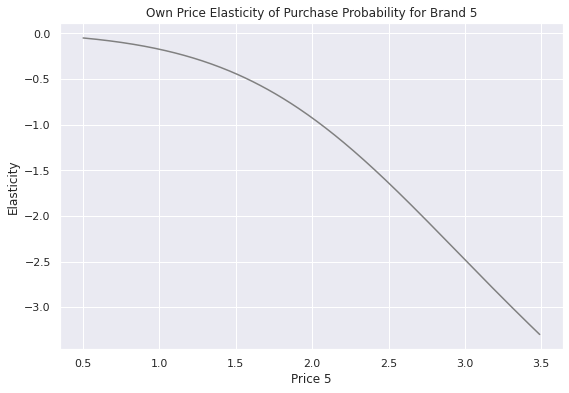

In [38]:

plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

In [39]:
#Cross Price Elasticity 4,5
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [40]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [41]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4
pr_brand_4

array([0.60919514, 0.60674147, 0.60428143, 0.60181512, 0.59934263,
       0.59686406, 0.59437952, 0.5918891 , 0.58939291, 0.58689105,
       0.58438363, 0.58187076, 0.57935253, 0.57682906, 0.57430046,
       0.57176683, 0.56922829, 0.56668495, 0.56413693, 0.56158433,
       0.55902727, 0.55646587, 0.55390024, 0.5513305 , 0.54875677,
       0.54617916, 0.5435978 , 0.54101281, 0.53842431, 0.53583242,
       0.53323726, 0.53063896, 0.52803763, 0.52543341, 0.52282642,
       0.52021679, 0.51760464, 0.5149901 , 0.51237329, 0.50975435,
       0.50713341, 0.50451058, 0.50188601, 0.49925982, 0.49663214,
       0.4940031 , 0.49137283, 0.48874147, 0.48610915, 0.48347599,
       0.48084213, 0.4782077 , 0.47557284, 0.47293767, 0.47030234,
       0.46766696, 0.46503168, 0.46239663, 0.45976195, 0.45712775,
       0.45449419, 0.45186138, 0.44922947, 0.44659859, 0.44396886,
       0.44134043, 0.43871342, 0.43608797, 0.43346421, 0.43084227,
       0.42822228, 0.42560438, 0.4229887 , 0.42037536, 0.41776

In [42]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096386,-0.168077,-0.031026,-0.209928,-0.235765,-0.125677,-0.195575,-0.049055,0.332011
1,0.51,-0.100453,-0.173003,-0.032798,-0.216500,-0.243145,-0.129791,-0.201694,-0.050616,0.337288
2,0.52,-0.104648,-0.177999,-0.034658,-0.223182,-0.250649,-0.133985,-0.207915,-0.052207,0.342507
3,0.53,-0.108972,-0.183066,-0.036608,-0.229973,-0.258277,-0.138258,-0.214240,-0.053827,0.347669
4,0.54,-0.113430,-0.188205,-0.038653,-0.236876,-0.266029,-0.142612,-0.220669,-0.055477,0.352773
5,0.55,-0.118024,-0.193415,-0.040798,-0.243890,-0.273907,-0.147048,-0.227203,-0.057158,0.357820
6,0.56,-0.122759,-0.198698,-0.043046,-0.251018,-0.281911,-0.151566,-0.233842,-0.058871,0.362809
7,0.57,-0.127636,-0.204053,-0.045402,-0.258258,-0.290043,-0.156169,-0.240588,-0.060615,0.367741
8,0.58,-0.132660,-0.209482,-0.047871,-0.265613,-0.298303,-0.160857,-0.247442,-0.062391,0.372614
9,0.59,-0.137835,-0.214984,-0.050458,-0.273083,-0.306692,-0.165630,-0.254403,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

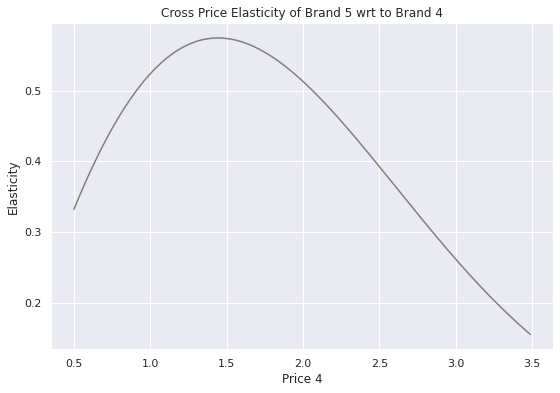

In [43]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

In [44]:
#Own and Cross Price(Segment)
#Well-off
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
376,200000005,51,1,5,1,0,0,1.35,1.87,1.93,2.09,2.59,1,1,1,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
377,200000005,57,1,5,1,5,1,1.39,1.90,1.91,2.12,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
394,200000005,159,1,5,2,0,0,1.39,1.90,1.94,2.16,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
396,200000005,178,1,5,3,0,0,1.48,1.50,1.99,2.16,2.49,0,0,0,1,1,0,0,49,1,121466,1,2,3,0,0,0,1
410,200000005,249,1,5,1,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0,0,0,49,1,121466,1,2,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57586,200000491,690,1,5,2,5,1,1.50,1.87,2.06,2.24,2.78,0,1,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57587,200000491,697,1,5,5,5,1,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57588,200000491,704,1,5,5,5,1,1.41,1.85,2.01,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1
57589,200000491,714,1,5,1,5,1,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3,0,0,0,1


In [45]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.38,1.13,1.39,-0.02,-0.11
Price_2,0.73,-1.65,0.05,0.40,0.47
Price_3,1.17,0.21,0.46,-1.71,-0.13
Price_4,0.03,0.65,0.41,-1.08,-0.01
Price_5,-0.00,-0.20,0.34,0.42,-0.55


In [46]:
#Own Brand
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [ ]:
#Cross Brand
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

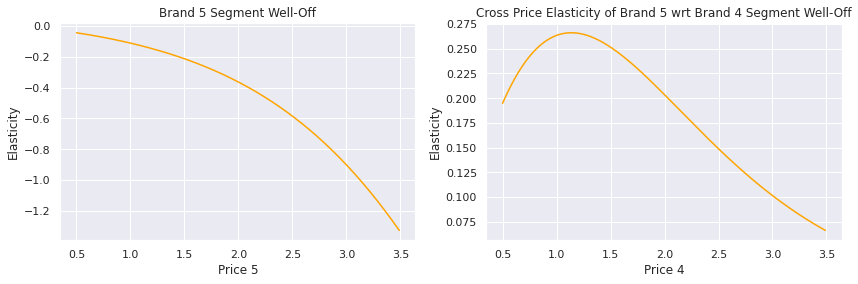

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

In [49]:
#Standard
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0


In [50]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [51]:
#Own Brand
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

In [52]:
#Cross Brand
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

In [53]:
#Career Focused
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [54]:
#Own Brand

df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

#Cross Brand
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

In [55]:
#Fewer Opportunities
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

In [56]:
#Own Brand

df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

In [ ]:
#Cross Brand

df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

Text(0.5, 0, 'Price 4')

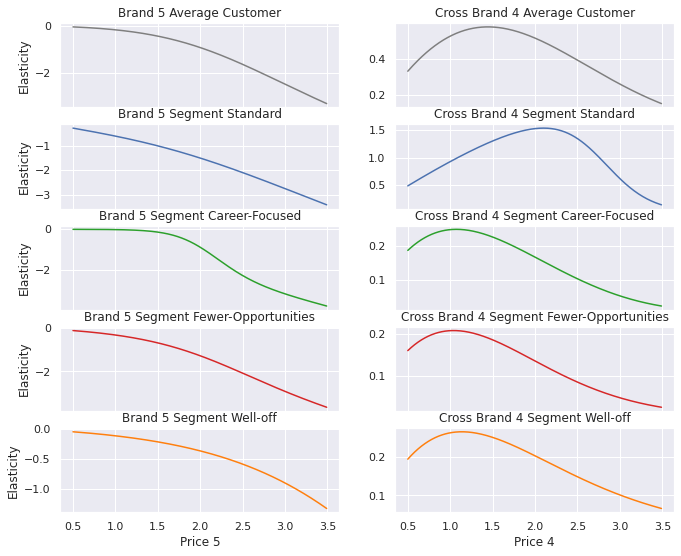

In [58]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')